In [45]:
import pandas as pd
import pyomo as py
import pyomo.environ as pyo
import numpy as np

In [46]:
model = pyo.ConcreteModel()
# sets of model
model.f = pyo.RangeSet(15) #potentional location for farms
model.a = pyo.RangeSet(12) #potentional location for abattoir
model.c = pyo.RangeSet(20) #customers
model.j = pyo.RangeSet(2) #products including livestock and meat
model.t = pyo.RangeSet(1) #periods of time
model.r = pyo.RangeSet(21) #potentional location for retailer 
list_set = [model.f,model.a,model.c,model.j,model.t,model.r]
for i in list_set:
    i.pprint()

f : Dimen=1, Size=15, Bounds=(1, 15)
    Key  : Finite : Members
    None :   True :  [1:15]
a : Dimen=1, Size=12, Bounds=(1, 12)
    Key  : Finite : Members
    None :   True :  [1:12]
c : Dimen=1, Size=20, Bounds=(1, 20)
    Key  : Finite : Members
    None :   True :  [1:20]
j : Dimen=1, Size=2, Bounds=(1, 2)
    Key  : Finite : Members
    None :   True :   [1:2]
t : Dimen=1, Size=1, Bounds=(1, 1)
    Key  : Finite : Members
    None :   True :     [1]
r : Dimen=1, Size=21, Bounds=(1, 21)
    Key  : Finite : Members
    None :   True :  [1:21]


In [47]:
# p_fjt
purches_dict = {}
for (f,j,t) in model.f*model.j*model.t:
    if j==1 :
        purches_dict[(f,j,t)] = 1649.5
    else:
        purches_dict[(f,j,t)] = 5574.6

# x_fj        
cap_dict = {}
for (f,j) in model.f*model.j:
    cap_dict[(f,j)] = 15

# d_cjt
demand_dict = {(1,1,1) : 27.316,
               (1,2,1) : 27.316,
               (2,1,1) : 5.369,
               (2,2,1) : 5.369,
               (3,1,1) : 3.838,
               (3,2,1) : 3.838,
               (4,1,1) : 2.332,
               (4,2,1) : 2.332,
               (5,1,1) : 2.172,
               (5,2,1) : 2.172,
               (6,1,1) : 0.716,
               (6,2,1) : 0.716,
               (7,1,1) : 0.318,
               (7,2,1) : 0.318,
               (8,1,1) : 1.016,
               (8,2,1) : 1.016,
               (9,1,1) : 0.974,
               (9,2,1) : 0.974,
               (10,1,1) : 1.414,
               (10,2,1) : 1.414,
               (11,1,1) : 1.594,
               (11,2,1) : 1.594,
               (12,1,1) : 1.331,
               (12,2,1) : 1.331,
               (13,1,1) : 1.317,
               (13,2,1) : 1.317,
               (14,1,1) : 1.299,
               (14,2,1) : 1.299,
               (15,1,1) : 1.049,
               (15,2,1) : 1.049,
               (16,1,1) : 0.074,
               (16,2,1) : 0.074,
               (17,1,1) : 0.03,
               (17,2,1) : 0.03,
               (18,1,1) : 0.086,
               (18,2,1) : 0.086,
               (19,1,1) : 0.185,
               (19,2,1) : 0.185,
               (20,1,1) : 0.217,
               (20,2,1) : 0.217}
# unit_trans_cost_livestock(kc_fajt)
trans_cost_livestock_dict = {}
for (f,a,j,t) in model.f*model.a*model.j*model.t:
    trans_cost_livestock_dict[(f,a,j,t)] = 0.005

# unit_trans_cost_processed(lc_arjt)
trans_cost_processed_dict = {}
for (a,r,j,t) in model.a*model.r*model.j*model.t:
    trans_cost_processed_dict[(a,r,j,t)] = 0.005

# unit_trans_cost_meat(mc_rcjt)
trans_cost_meat_dict = {}
for (r,c,j,t) in model.r*model.c*model.j*model.t:
    trans_cost_meat_dict[(r,c,j,t)] = 0.005

# fixed_cost_farm(n_f)
fixed_cost_farm = {}
for f in model.f:
    fixed_cost_farm[(f)] = 10000

# fixed_cost_abattoir(b_a)
fixed_cost_abattoir = {}
for a in model.a :
    fixed_cost_abattoir[(a)] = 1000000

# fixed_cost_retailer(e_r)
fixed_cost_retailer = {}
for r in model.r:
    fixed_cost_retailer[(r)] = 20000

# distance_farm_abattoir(de_fa)
dis_farm_abattoir_dict = {}
max_dis = 150
min_dis = 50
for (f,a) in model.f*model.a:
    dis_farm_abattoir_dict[(f,a)] = round(np.random.uniform(min_dis,max_dis))

# distance_abattoir_retailer(ge_ar)
dis_abattoir_retailer_dict = {}
for (a,r) in model.a*model.r:
    dis_abattoir_retailer_dict[(a,r)] = round(np.random.uniform(min_dis,max_dis))

# distance_retailer_customer(he_rc)
dis_retailer_customer_dict = {}
for (r,c) in model.r*model.c:
    dis_retailer_customer_dict[(r,c)] = round(np.random.uniform(min_dis,max_dis))

# max_cap_retailer(u_rj)
max_cap_retailer = {}
for (r,j) in model.r*model.j:
    max_cap_retailer[(r,j)] = 15

# max_cap_abattoir(o_aj)
max_cap_abattoir = {}
for (a,j) in model.a*model.j:
    max_cap_abattoir[(a,j)] = 15

# weight_product(w_j)
weight_product_dict = {1 : 0.635,
                       2 : 0.041}

purches_dict

{(1, 1, 1): 1649.5,
 (1, 2, 1): 5574.6,
 (2, 1, 1): 1649.5,
 (2, 2, 1): 5574.6,
 (3, 1, 1): 1649.5,
 (3, 2, 1): 5574.6,
 (4, 1, 1): 1649.5,
 (4, 2, 1): 5574.6,
 (5, 1, 1): 1649.5,
 (5, 2, 1): 5574.6,
 (6, 1, 1): 1649.5,
 (6, 2, 1): 5574.6,
 (7, 1, 1): 1649.5,
 (7, 2, 1): 5574.6,
 (8, 1, 1): 1649.5,
 (8, 2, 1): 5574.6,
 (9, 1, 1): 1649.5,
 (9, 2, 1): 5574.6,
 (10, 1, 1): 1649.5,
 (10, 2, 1): 5574.6,
 (11, 1, 1): 1649.5,
 (11, 2, 1): 5574.6,
 (12, 1, 1): 1649.5,
 (12, 2, 1): 5574.6,
 (13, 1, 1): 1649.5,
 (13, 2, 1): 5574.6,
 (14, 1, 1): 1649.5,
 (14, 2, 1): 5574.6,
 (15, 1, 1): 1649.5,
 (15, 2, 1): 5574.6}

In [48]:
# parameters of model
model.p = pyo.Param(model.f , model.j , model.t , initialize = purches_dict) #purchasing cost
model.n = pyo.Param(model.f , initialize = fixed_cost_farm) #fixed cost farm
model.b = pyo.Param(model.a , initialize = fixed_cost_abattoir) #fixed cost abattoir
model.e = pyo.Param(model.r , initialize = fixed_cost_retailer) #fixed cost retailer
model.de = pyo.Param(model.f , model.a , initialize = dis_farm_abattoir_dict ) #transportation distance farm to abattoir
model.ge = pyo.Param(model.a , model.r , initialize = dis_abattoir_retailer_dict) #transportation distance abattoir to retailer
model.he = pyo.Param(model.r , model.c , initialize = dis_retailer_customer_dict) #transportation distance retailer to customer
model.kc = pyo.Param(model.f , model.a , model.j , model.t , initialize = trans_cost_livestock_dict) #unit transportation cost for product
model.lc = pyo.Param(model.a ,model.r , model.j , model.t , initialize = trans_cost_processed_dict) #unit transportation cost for proccessed meat
model.mc = pyo.Param(model.r , model.c , model.j , model.t , initialize = trans_cost_meat_dict) #unit transportation cost for meat
model.d = pyo.Param(model.c , model.j , model.t ,initialize = demand_dict) #demand
model.x = pyo.Param(model.f , model.j , initialize = cap_dict ) #max supply cap farm
model.o = pyo.Param(model.a , model.j , initialize = max_cap_abattoir ) #max supply cap abattoir
model.u = pyo.Param(model.r , model.j , initialize = max_cap_retailer) #max supply cap retailer
model.alpha = pyo.Param(initialize = 222) #emission CO2
model.w = pyo.Param(model.j , initialize = weight_product_dict) #weight of product



In [49]:
#D.V
model.qu = pyo.Var(model.f , model.a , model.j , model.t , domain = pyo.NonNegativeReals) #quantity of livestock transported from farm to abattoir
model.qn = pyo.Var(model.a , model.r , model.j , model.t , domain = pyo.NonNegativeReals) #quantity of proccessed meat transported from abattoir to retailer
model.qa = pyo.Var(model.r , model.c , model.j , model.t , domain = pyo.NonNegativeReals) #quantity of meat transported from retailer to customer 
model.z = pyo.Var(model.f , domain = pyo.Binary) #selecting farm or not
model.i = pyo.Var(model.a , domain = pyo.Binary) #selecting abattoir or not
model.y = pyo.Var(model.r , domain = pyo.Binary) #selecting retailer or not
model.slack1 = pyo.Var(domain = pyo.NonNegativeReals)
model.slack2 = pyo.Var(domain = pyo.NonNegativeReals)
model.pprint()


6 RangeSet Declarations
    a : Dimen=1, Size=12, Bounds=(1, 12)
        Key  : Finite : Members
        None :   True :  [1:12]
    c : Dimen=1, Size=20, Bounds=(1, 20)
        Key  : Finite : Members
        None :   True :  [1:20]
    f : Dimen=1, Size=15, Bounds=(1, 15)
        Key  : Finite : Members
        None :   True :  [1:15]
    j : Dimen=1, Size=2, Bounds=(1, 2)
        Key  : Finite : Members
        None :   True :   [1:2]
    r : Dimen=1, Size=21, Bounds=(1, 21)
        Key  : Finite : Members
        None :   True :  [1:21]
    t : Dimen=1, Size=1, Bounds=(1, 1)
        Key  : Finite : Members
        None :   True :     [1]

16 Param Declarations
    alpha : Size=1, Index=None, Domain=Any, Default=None, Mutable=False
        Key  : Value
        None :   222
    b : Size=12, Index=a, Domain=Any, Default=None, Mutable=False
        Key : Value
          1 : 1000000
          2 : 1000000
          3 : 1000000
          4 : 1000000
          5 : 1000000
          6 : 100

In [50]:
#Minimize Z1: costs
def objective_z1(model):
    s1 = pyo.quicksum(model.qu[f,a,j,t]*(model.p[f,j,t]+model.kc[f,a,j,t]*model.de[f,a]) for (f,a,j,t) in model.f*model.a*model.j*model.t)
    s2 = pyo.quicksum(model.lc[a,r,j,t]*model.ge[a,r]*model.qn[a,r,j,t] for (a,r,j,t) in model.a*model.r*model.j*model.t)
    s3 = pyo.quicksum(model.mc[r,c,j,t]*model.he[r,c]*model.qa[r,c,j,t] for (r,c,j,t) in model.r*model.c*model.j*model.t)
    s4 = pyo.quicksum(model.n[f]*model.z[f] for (f) in model.f)
    s5 = pyo.quicksum(model.b[a]*model.i[a] for (a) in model.a)
    s6 = pyo.quicksum(model.e[r]*model.y[r] for (r) in model.r)
    return s1 + s2 + s3 + s4 + s5 + s6

model.Z1 = pyo.Objective(rule=objective_z1, sense=pyo.minimize)

#Minimize Z2: CO2 emission
def objective_z2(model):
    s1 = pyo.quicksum(model.w[j]*model.de[f,a]*model.qu[f,a,j,t] for (f,a,j,t) in model.f*model.a*model.j*model.t)
    s2 = pyo.quicksum(model.w[j]*model.ge[a,r]*model.qn[a,r,j,t] for (a,r,j,t) in model.a*model.r*model.j*model.t)
    s3 = pyo.quicksum(model.w[j]*model.he[r,c]*model.qa[r,c,j,t] for (r,c,j,t) in model.r*model.c*model.j*model.t)
    return model.alpha*(s1+s2+s3)

model.Z2 = pyo.Objective(rule=objective_z2, sense=pyo.minimize)

#Maximize Z3: total capacity utilization of facilities
def objective_z3(model):
    s1 = pyo.quicksum(model.qu[f,a,j,t]/model.x[f,j] for (f,a,j,t) in model.f*model.a*model.j*model.t)
    s2 = pyo.quicksum(model.qn[a,r,j,t]/model.o[a,j] for (a,r,j,t) in model.a*model.r*model.j*model.t)
    s3 = pyo.quicksum(model.qa[r,c,j,t]/model.u[r,j] for (r,c,j,t) in model.r*model.c*model.j*model.t)
    return s1+s2+s3

model.Z3 = pyo.Objective(rule=objective_z3, sense=pyo.maximize)

model.Z1.pprint()
model.Z2.pprint()
model.Z3.pprint()



Z1 : Size=1, Index=None, Active=True
    Key  : Active : Sense    : Expression
    None :   True : minimize : 1649.91*qu[1,1,1,1] + 5575.01*qu[1,1,2,1] + 1650.075*qu[1,2,1,1] + 5575.175*qu[1,2,2,1] + 1650.13*qu[1,3,1,1] + 5575.2300000000005*qu[1,3,2,1] + 1650.225*qu[1,4,1,1] + 5575.325000000001*qu[1,4,2,1] + 1649.955*qu[1,5,1,1] + 5575.055*qu[1,5,2,1] + 1650.2*qu[1,6,1,1] + 5575.3*qu[1,6,2,1] + 1649.775*qu[1,7,1,1] + 5574.875*qu[1,7,2,1] + 1649.895*qu[1,8,1,1] + 5574.995000000001*qu[1,8,2,1] + 1649.925*qu[1,9,1,1] + 5575.025000000001*qu[1,9,2,1] + 1650.085*qu[1,10,1,1] + 5575.185*qu[1,10,2,1] + 1649.82*qu[1,11,1,1] + 5574.92*qu[1,11,2,1] + 1650.215*qu[1,12,1,1] + 5575.3150000000005*qu[1,12,2,1] + 1649.855*qu[2,1,1,1] + 5574.955*qu[2,1,2,1] + 1649.785*qu[2,2,1,1] + 5574.885*qu[2,2,2,1] + 1649.775*qu[2,3,1,1] + 5574.875*qu[2,3,2,1] + 1650.175*qu[2,4,1,1] + 5575.275000000001*qu[2,4,2,1] + 1650.18*qu[2,5,1,1] + 5575.280000000001*qu[2,5,2,1] + 1650.055*qu[2,6,1,1] + 5575.155000000001*qu[2,6

In [51]:
#(4)
def constraint_4(model,f,t):
    return pyo.quicksum(model.qu[f,a,j,t] for a in model.a for j in model.j) <= model.z[f] * pyo.quicksum(model.x[f, j] for j in model.j)

model.constraint4 = pyo.Constraint(model.f, model.t, rule=constraint_4)

#(5)
def constraint_5(model,a,t):
    return pyo.quicksum(model.qn[a,r,j,t] for r in model.r for j in model.j) <= model.i[a] * pyo.quicksum(model.o[a,j] for j in model.j)

model.constraint5 = pyo.Constraint(model.a, model.t, rule=constraint_5)

#(6)
def constraint_6(model,r,t):
    return pyo.quicksum(model.qa[r,c,j,t] for c in model.c for j in model.j) <= model.y[r] * pyo.quicksum(model.u[r,j] for j in model.j)

model.constraint6 = pyo.Constraint(model.r, model.t, rule=constraint_6)

#(7)
def constraint_7(model,a,j,t):
    return pyo.quicksum(model.qu[f,a,j,t] for f in model.f) >= pyo.quicksum(model.qn[a,r,j,t] for r in model.r)

model.constraint7 = pyo.Constraint(model.a, model.j, model.t, rule=constraint_7)

#(8)
def constraint_8(model,r,j,t):
    return pyo.quicksum(model.qn[a,r,j,t] for a in model.a) >= pyo.quicksum(model.qa[r,c,j,t] for c in model.c)

model.constraint8 = pyo.Constraint(model.r, model.j, model.t, rule=constraint_8)

#(9)
def constraint_9(model,c,j,t):
    return pyo.quicksum(model.qa[r,c,j,t] for r in model.r) == model.d[c,j,t]

model.constraint9 = pyo.Constraint(model.c, model.j, model.t, rule=constraint_9)

model.constraint4.pprint()
model.constraint5.pprint()
model.constraint6.pprint()
model.constraint7.pprint()
model.constraint8.pprint()
model.constraint9.pprint()


constraint4 : Size=15, Index=f*t, Active=True
    Key     : Lower : Body                                                                                                                                                                                                                                                                                                                                                                                   : Upper : Active
     (1, 1) :  -Inf :                          qu[1,1,1,1] + qu[1,1,2,1] + qu[1,2,1,1] + qu[1,2,2,1] + qu[1,3,1,1] + qu[1,3,2,1] + qu[1,4,1,1] + qu[1,4,2,1] + qu[1,5,1,1] + qu[1,5,2,1] + qu[1,6,1,1] + qu[1,6,2,1] + qu[1,7,1,1] + qu[1,7,2,1] + qu[1,8,1,1] + qu[1,8,2,1] + qu[1,9,1,1] + qu[1,9,2,1] + qu[1,10,1,1] + qu[1,10,2,1] + qu[1,11,1,1] + qu[1,11,2,1] + qu[1,12,1,1] + qu[1,12,2,1] - 30*z[1] :   0.0 :   True
     (2, 1) :  -Inf :                          qu[2,1,1,1] + qu[2,1,2,1] + qu[2,2,1,1] + qu[2,2,2,1] + qu[2,3,1,1] + qu[2,3,2,

In [52]:
model.Z2.deactivate()
model.Z3.deactivate()

solver = pyo.SolverFactory('cplex')
results = solver.solve(model)

print("Solution:")
for (f,a,j,t) in model.f*model.a*model.j*model.t:
    print(f'qu[{f,a,j,t}] = {model.qu[f,a,j,t].value}')

for (a,r,j,t) in model.a*model.r*model.j*model.t:
    print(f'qn[{a,r,j,t}] = {model.qn[a,r,j,t].value}')

for (r,c,j,t) in model.r*model.c*model.j*model.t:
    print(f'qa[{r,c,j,t}] = {model.qa[r,c,j,t].value}')

for f in model.f:
    print(f'z[{f}] = {model.z[f].value}')

for a in model.a:
    print(f'i[{a}] = {model.i[a].value}')

for r in model.r:
    print(f'y[{r}] = {model.y[r].value}')

best_z1 = model.Z1()
print("Objective value (Z1) =", model.Z1())
print("Objective value (Z2) =", model.Z2())
print("Objective value (Z3) =", model.Z3())


Solution:
qu[(1, 1, 1, 1)] = 0.0
qu[(1, 1, 2, 1)] = 0.0
qu[(1, 2, 1, 1)] = 0.0
qu[(1, 2, 2, 1)] = 0.0
qu[(1, 3, 1, 1)] = 0.0
qu[(1, 3, 2, 1)] = 0.0
qu[(1, 4, 1, 1)] = 0.0
qu[(1, 4, 2, 1)] = 0.0
qu[(1, 5, 1, 1)] = 0.0
qu[(1, 5, 2, 1)] = 0.0
qu[(1, 6, 1, 1)] = 0.0
qu[(1, 6, 2, 1)] = 0.0
qu[(1, 7, 1, 1)] = 2.0330000000000013
qu[(1, 7, 2, 1)] = 27.967
qu[(1, 8, 1, 1)] = 0.0
qu[(1, 8, 2, 1)] = 0.0
qu[(1, 9, 1, 1)] = 0.0
qu[(1, 9, 2, 1)] = 0.0
qu[(1, 10, 1, 1)] = 0.0
qu[(1, 10, 2, 1)] = 0.0
qu[(1, 11, 1, 1)] = 0.0
qu[(1, 11, 2, 1)] = 0.0
qu[(1, 12, 1, 1)] = 0.0
qu[(1, 12, 2, 1)] = 0.0
qu[(2, 1, 1, 1)] = 0.0
qu[(2, 1, 2, 1)] = 0.0
qu[(2, 2, 1, 1)] = 0.0
qu[(2, 2, 2, 1)] = 0.0
qu[(2, 3, 1, 1)] = 0.0
qu[(2, 3, 2, 1)] = 0.0
qu[(2, 4, 1, 1)] = 0.0
qu[(2, 4, 2, 1)] = 0.0
qu[(2, 5, 1, 1)] = 0.0
qu[(2, 5, 2, 1)] = 0.0
qu[(2, 6, 1, 1)] = 0.0
qu[(2, 6, 2, 1)] = 0.0
qu[(2, 7, 1, 1)] = 0.0
qu[(2, 7, 2, 1)] = 0.0
qu[(2, 8, 1, 1)] = 0.0
qu[(2, 8, 2, 1)] = 0.0
qu[(2, 9, 1, 1)] = 0.0
qu[(2, 9, 2, 1)] = 0.0


In [53]:
model.Z1.deactivate()
model.Z2.activate()
model.Z3.deactivate()

solver = pyo.SolverFactory('cplex')
results = solver.solve(model)

print("Solution:")
for (f,a,j,t) in model.f*model.a*model.j*model.t:
    print(f'qu[{f,a,j,t}] = {model.qu[f,a,j,t].value}')

for (a,r,j,t) in model.a*model.r*model.j*model.t:
    print(f'qn[{a,r,j,t}] = {model.qn[a,r,j,t].value}')

for (r,c,j,t) in model.r*model.c*model.j*model.t:
    print(f'qa[{r,c,j,t}] = {model.qa[r,c,j,t].value}')

for f in model.f:
    print(f'z[{f}] = {model.z[f].value}')

for a in model.a:
    print(f'i[{a}] = {model.i[a].value}')

for r in model.r:
    print(f'y[{r}] = {model.y[r].value}')

print("Objective value (Z1) =", model.Z1())
print("Objective value (Z2) =", model.Z2())
print("Objective value (Z3) =", model.Z3())

best_z2 = model.Z2()

# list_obj2 = [model.Z1() , model.Z2() , model.Z3()]
# list_total_obj =[]
# list_total_obj.append(list_obj1)
# list_total_obj.append(list_obj2)
# list_total_obj

Solution:
qu[(1, 1, 1, 1)] = 0.0
qu[(1, 1, 2, 1)] = 0.0
qu[(1, 2, 1, 1)] = 0.0
qu[(1, 2, 2, 1)] = 0.0
qu[(1, 3, 1, 1)] = 0.0
qu[(1, 3, 2, 1)] = 0.0
qu[(1, 4, 1, 1)] = 0.0
qu[(1, 4, 2, 1)] = 0.0
qu[(1, 5, 1, 1)] = 0.0
qu[(1, 5, 2, 1)] = 0.0
qu[(1, 6, 1, 1)] = 0.0
qu[(1, 6, 2, 1)] = 0.0
qu[(1, 7, 1, 1)] = 29.349
qu[(1, 7, 2, 1)] = 0.0
qu[(1, 8, 1, 1)] = 0.0
qu[(1, 8, 2, 1)] = 0.0
qu[(1, 9, 1, 1)] = 0.0
qu[(1, 9, 2, 1)] = 0.0
qu[(1, 10, 1, 1)] = 0.0
qu[(1, 10, 2, 1)] = 0.0
qu[(1, 11, 1, 1)] = 0.0
qu[(1, 11, 2, 1)] = 0.6509999999999998
qu[(1, 12, 1, 1)] = 0.0
qu[(1, 12, 2, 1)] = 0.0
qu[(2, 1, 1, 1)] = 0.0
qu[(2, 1, 2, 1)] = 0.0
qu[(2, 2, 1, 1)] = 0.0
qu[(2, 2, 2, 1)] = 0.0
qu[(2, 3, 1, 1)] = 0.0
qu[(2, 3, 2, 1)] = 0.0
qu[(2, 4, 1, 1)] = 0.0
qu[(2, 4, 2, 1)] = 0.0
qu[(2, 5, 1, 1)] = 0.0
qu[(2, 5, 2, 1)] = 0.0
qu[(2, 6, 1, 1)] = 0.0
qu[(2, 6, 2, 1)] = 0.0
qu[(2, 7, 1, 1)] = 0.0
qu[(2, 7, 2, 1)] = 0.0
qu[(2, 8, 1, 1)] = 0.0
qu[(2, 8, 2, 1)] = 0.0
qu[(2, 9, 1, 1)] = 0.0
qu[(2, 9, 2, 1)] = 0.0


In [54]:
model.Z1.deactivate()
model.Z2.deactivate()
model.Z3.activate()

solver = pyo.SolverFactory('cplex')
results = solver.solve(model)

print("Solution:")
for (f,a,j,t) in model.f*model.a*model.j*model.t:
    print(f'qu[{f,a,j,t}] = {model.qu[f,a,j,t].value}')

for (a,r,j,t) in model.a*model.r*model.j*model.t:
    print(f'qn[{a,r,j,t}] = {model.qn[a,r,j,t].value}')

for (r,c,j,t) in model.r*model.c*model.j*model.t:
    print(f'qa[{r,c,j,t}] = {model.qa[r,c,j,t].value}')

for f in model.f:
    print(f'z[{f}] = {model.z[f].value}')

for a in model.a:
    print(f'i[{a}] = {model.i[a].value}')

for r in model.r:
    print(f'y[{r}] = {model.y[r].value}')

print("Objective value (Z1) =", model.Z1())
print("Objective value (Z2) =", model.Z2())
print("Objective value (Z3) =", model.Z3())

best_z3 = model.Z3()

# list_obj3 = [model.Z1() , model.Z2() , model.Z3()]
# list_total_obj.append(list_obj3)
# list_total_obj

Solution:
qu[(1, 1, 1, 1)] = 1.25
qu[(1, 1, 2, 1)] = 1.25
qu[(1, 2, 1, 1)] = 1.25
qu[(1, 2, 2, 1)] = 1.25
qu[(1, 3, 1, 1)] = 1.25
qu[(1, 3, 2, 1)] = 1.25
qu[(1, 4, 1, 1)] = 1.25
qu[(1, 4, 2, 1)] = 1.25
qu[(1, 5, 1, 1)] = 1.25
qu[(1, 5, 2, 1)] = 1.25
qu[(1, 6, 1, 1)] = 1.25
qu[(1, 6, 2, 1)] = 1.25
qu[(1, 7, 1, 1)] = 1.25
qu[(1, 7, 2, 1)] = 1.25
qu[(1, 8, 1, 1)] = 1.25
qu[(1, 8, 2, 1)] = 1.25
qu[(1, 9, 1, 1)] = 1.25
qu[(1, 9, 2, 1)] = 1.25
qu[(1, 10, 1, 1)] = 1.25
qu[(1, 10, 2, 1)] = 1.25
qu[(1, 11, 1, 1)] = 1.25
qu[(1, 11, 2, 1)] = 1.25
qu[(1, 12, 1, 1)] = 1.25
qu[(1, 12, 2, 1)] = 1.25
qu[(2, 1, 1, 1)] = 1.25
qu[(2, 1, 2, 1)] = 1.25
qu[(2, 2, 1, 1)] = 1.25
qu[(2, 2, 2, 1)] = 1.25
qu[(2, 3, 1, 1)] = 1.25
qu[(2, 3, 2, 1)] = 1.25
qu[(2, 4, 1, 1)] = 1.25
qu[(2, 4, 2, 1)] = 1.25
qu[(2, 5, 1, 1)] = 1.25
qu[(2, 5, 2, 1)] = 1.25
qu[(2, 6, 1, 1)] = 1.25
qu[(2, 6, 2, 1)] = 1.25
qu[(2, 7, 1, 1)] = 1.25
qu[(2, 7, 2, 1)] = 1.25
qu[(2, 8, 1, 1)] = 1.25
qu[(2, 8, 2, 1)] = 1.25
qu[(2, 9, 1, 1)] = 1.25


In [55]:
print(f'best value for Z1 = {best_z1}')
print(f'best value for Z2 = {best_z2}')
print(f'best value for Z3 = {best_z3}')

best value for Z1 = 4500416.62258
best value for Z2 = 1303912.378848
best value for Z3 = 61.0196


In [56]:
model.Z1.deactivate()
model.Z2.activate()
model.Z3.deactivate()

#Minimize Z1: costs
def nadir_constraint_z1(model):
    s1 = pyo.quicksum(model.qu[f,a,j,t]*(model.p[f,j,t]+model.kc[f,a,j,t]*model.de[f,a]) for (f,a,j,t) in model.f*model.a*model.j*model.t)
    s2 = pyo.quicksum(model.lc[a,r,j,t]*model.ge[a,r]*model.qn[a,r,j,t] for (a,r,j,t) in model.a*model.r*model.j*model.t)
    s3 = pyo.quicksum(model.mc[r,c,j,t]*model.he[r,c]*model.qa[r,c,j,t] for (r,c,j,t) in model.r*model.c*model.j*model.t)
    s4 = pyo.quicksum(model.n[f]*model.z[f] for (f) in model.f)
    s5 = pyo.quicksum(model.b[a]*model.i[a] for (a) in model.a)
    s6 = pyo.quicksum(model.e[r]*model.y[r] for (r) in model.r)
    return s1 + s2 + s3 + s4 + s5 + s6 == best_z1

model.nadir_constraint_z1 = pyo.Constraint(rule=nadir_constraint_z1)

#Minimize Z2: CO2 emission
def nadir_constraint_z2(model):
    s1 = pyo.quicksum(model.w[j]*model.de[f,a]*model.qu[f,a,j,t] for (f,a,j,t) in model.f*model.a*model.j*model.t)
    s2 = pyo.quicksum(model.w[j]*model.ge[a,r]*model.qn[a,r,j,t] for (a,r,j,t) in model.a*model.r*model.j*model.t)
    s3 = pyo.quicksum(model.w[j]*model.he[r,c]*model.qa[r,c,j,t] for (r,c,j,t) in model.r*model.c*model.j*model.t)
    return model.alpha*(s1+s2+s3) == best_z2

model.nadir_constraint_z2 = pyo.Constraint(rule=nadir_constraint_z2)

#Maximize Z3: total capacity utilization of facilities
def nadir_constraint_z3(model):
    s1 = pyo.quicksum(model.qu[f,a,j,t]/model.x[f,j] for (f,a,j,t) in model.f*model.a*model.j*model.t)
    s2 = pyo.quicksum(model.qn[a,r,j,t]/model.o[a,j] for (a,r,j,t) in model.a*model.r*model.j*model.t)
    s3 = pyo.quicksum(model.qa[r,c,j,t]/model.u[r,j] for (r,c,j,t) in model.r*model.c*model.j*model.t)
    return s1+s2+s3 == best_z3

model.nadir_constraint_z3 = pyo.Constraint(rule=nadir_constraint_z3)


In [57]:
model.nadir_constraint_z2.deactivate()
model.nadir_constraint_z3.deactivate()

solver = pyo.SolverFactory('cplex')
results = solver.solve(model)

nadir_z2_list = []
nadir_z3_list = []
nadir_z2_list.append(model.Z2())

print(nadir_z2_list)

[1337463.397015247]


In [58]:
model.Z1.deactivate()
model.Z2.activate()
model.Z3.deactivate()

model.nadir_constraint_z3.activate()

solver = pyo.SolverFactory('cplex')
results = solver.solve(model)

nadir_z2_list.append(model.Z2())
print(nadir_z2_list)

nadir_z2 = max(nadir_z2_list)

[1337463.397015247, 1337463.397015247]


In [59]:
model.Z2.pprint()

Z2 : Size=1, Index=None, Active=True
    Key  : Active : Sense    : Expression
    None :   True : minimize : 222*(52.07*qu[1,1,1,1] + 3.362*qu[1,1,2,1] + 73.025*qu[1,2,1,1] + 4.715*qu[1,2,2,1] + 80.01*qu[1,3,1,1] + 5.166*qu[1,3,2,1] + 92.075*qu[1,4,1,1] + 5.945*qu[1,4,2,1] + 57.785000000000004*qu[1,5,1,1] + 3.7310000000000003*qu[1,5,2,1] + 88.9*qu[1,6,1,1] + 5.74*qu[1,6,2,1] + 34.925*qu[1,7,1,1] + 2.255*qu[1,7,2,1] + 50.165*qu[1,8,1,1] + 3.2390000000000003*qu[1,8,2,1] + 53.975*qu[1,9,1,1] + 3.4850000000000003*qu[1,9,2,1] + 74.295*qu[1,10,1,1] + 4.797000000000001*qu[1,10,2,1] + 40.64*qu[1,11,1,1] + 2.624*qu[1,11,2,1] + 90.805*qu[1,12,1,1] + 5.863*qu[1,12,2,1] + 45.085*qu[2,1,1,1] + 2.911*qu[2,1,2,1] + 36.195*qu[2,2,1,1] + 2.337*qu[2,2,2,1] + 34.925*qu[2,3,1,1] + 2.255*qu[2,3,2,1] + 85.725*qu[2,4,1,1] + 5.535*qu[2,4,2,1] + 86.36*qu[2,5,1,1] + 5.5760000000000005*qu[2,5,2,1] + 70.485*qu[2,6,1,1] + 4.551*qu[2,6,2,1] + 52.705*qu[2,7,1,1] + 3.403*qu[2,7,2,1] + 51.435*qu[2,8,1,1] + 3.321*qu[2

In [60]:
model.Z1.deactivate()
model.Z2.deactivate()
model.Z3.activate()

model.nadir_constraint_z3.deactivate()
model.nadir_constraint_z2.deactivate()

solver = pyo.SolverFactory('cplex')
results = solver.solve(model)

nadir_z3_list.append(model.Z3())
print(nadir_z3_list)

[21.058799999999337]


In [61]:
model.nadir_constraint_z3.deactivate()
model.nadir_constraint_z2.activate()

solver = pyo.SolverFactory('cplex')
results = solver.solve(model)

nadir_z3_list.append(model.Z3())
print(nadir_z3_list)

nadir_z3 = min(nadir_z3_list)

[21.058799999999337, 21.058799999999337]


In [62]:
eps2 = (nadir_z2 - best_z2)/8
eps3 = (best_z3-nadir_z3)/8
print(eps2,eps3)

4193.877270905883 4.9951000000000825


In [63]:
del model.nadir_constraint_z3
del model.nadir_constraint_z2
del model.nadir_constraint_z1

model.Z1.deactivate()
model.Z2.deactivate()
model.Z3.deactivate()

pareto = []


#Minimize Z1: costs
def objective_z1_finall(model):
    s1 = pyo.quicksum(model.qu[f,a,j,t]*(model.p[f,j,t]+model.kc[f,a,j,t]*model.de[f,a]) for (f,a,j,t) in model.f*model.a*model.j*model.t)
    s2 = pyo.quicksum(model.lc[a,r,j,t]*model.ge[a,r]*model.qn[a,r,j,t] for (a,r,j,t) in model.a*model.r*model.j*model.t)
    s3 = pyo.quicksum(model.mc[r,c,j,t]*model.he[r,c]*model.qa[r,c,j,t] for (r,c,j,t) in model.r*model.c*model.j*model.t)
    s4 = pyo.quicksum(model.n[f]*model.z[f] for (f) in model.f)
    s5 = pyo.quicksum(model.b[a]*model.i[a] for (a) in model.a)
    s6 = pyo.quicksum(model.e[r]*model.y[r] for (r) in model.r)
    return s1 + s2 + s3 + s4 + s5 + s6 + 0.0001 * (model.slack1 + model.slack2)

model.Z1_finall = pyo.Objective(rule=objective_z1_finall, sense=pyo.minimize)


for n in range(0,9):
    for i in range(0,9):
        #constrain Z2: CO2 emission
        def constraint_z2(model):
            global n
            s1 = pyo.quicksum(model.w[j]*model.de[f,a]*model.qu[f,a,j,t] for (f,a,j,t) in model.f*model.a*model.j*model.t)
            s2 = pyo.quicksum(model.w[j]*model.ge[a,r]*model.qn[a,r,j,t] for (a,r,j,t) in model.a*model.r*model.j*model.t)
            s3 = pyo.quicksum(model.w[j]*model.he[r,c]*model.qa[r,c,j,t] for (r,c,j,t) in model.r*model.c*model.j*model.t)
            return model.alpha*(s1+s2+s3) + model.slack1 == nadir_z2-n*eps2

        model.constraint_Z2 = pyo.Constraint(rule=constraint_z2)

        #constraint Z3: total capacity utilization of facilities
        def constraint_z3(model):
            global i
            s1 = pyo.quicksum(model.qu[f,a,j,t]/model.x[f,j] for (f,a,j,t) in model.f*model.a*model.j*model.t)
            s2 = pyo.quicksum(model.qn[a,r,j,t]/model.o[a,j] for (a,r,j,t) in model.a*model.r*model.j*model.t)
            s3 = pyo.quicksum(model.qa[r,c,j,t]/model.u[r,j] for (r,c,j,t) in model.r*model.c*model.j*model.t)
            return s1+s2+s3 - model.slack2 == nadir_z3+i*eps3

        model.constraint_Z3 = pyo.Constraint(rule=constraint_z3)

        


        solver = pyo.SolverFactory('cplex')
        results = solver.solve(model)
        print("Objective value (Z1) =", model.Z1())
        print("Objective value (Z2) =", model.Z2())
        print("Objective value (Z3) =", model.Z3())
        pareto.append([model.Z1(),model.Z2(),model.Z3()])
        model.constraint_Z2.pprint()
        
        del model.constraint_Z2
        del model.constraint_Z3

print(pareto)


Objective value (Z1) = 4500416.622579992
Objective value (Z2) = 1337463.397015247
Objective value (Z3) = 21.058799999999998
constraint_Z2 : Size=1, Index=None, Active=True
    Key  : Lower             : Body                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         

In [64]:
pareto

[[4500416.622579992, 1337463.397015247, 21.058799999999998],
 [4500416.622579992, 1337463.397015247, 21.058799999999998],
 [4500416.622579992, 1337463.397015247, 21.058799999999998],
 [4500416.622579992, 1337463.397015247, 21.058799999999998],
 [4500416.622579992, 1337463.397015247, 21.058799999999998],
 [4500416.622579992, 1337463.397015247, 21.058799999999998],
 [4500416.622579992, 1337463.397015247, 21.058799999999998],
 [4500416.622579992, 1337463.397015247, 21.058799999999998],
 [4500416.622579992, 1337463.397015247, 21.058799999999998],
 [4500418.312624865, 1333269.519744342, 21.058799999999334],
 [4500418.312624865, 1333269.519744342, 21.058799999999334],
 [4500418.312624865, 1333269.519744342, 21.058799999999334],
 [4500418.312624865, 1333269.519744342, 21.058799999999334],
 [4500418.312624865, 1333269.519744342, 21.058799999999334],
 [4500418.312624865, 1333269.519744342, 21.058799999999334],
 [4500418.312624865, 1333269.519744342, 21.058799999999334],
 [4500418.312624865, 133

In [65]:
len(pareto)

81

In [66]:
pareto[0][0]

4500416.622579992

In [67]:
list_z1 = []
for i in range(0,len(pareto)):
    list_z1.append(pareto[i][0])

list_z1

[4500416.622579992,
 4500416.622579992,
 4500416.622579992,
 4500416.622579992,
 4500416.622579992,
 4500416.622579992,
 4500416.622579992,
 4500416.622579992,
 4500416.622579992,
 4500418.312624865,
 4500418.312624865,
 4500418.312624865,
 4500418.312624865,
 4500418.312624865,
 4500418.312624865,
 4500418.312624865,
 4500418.312624865,
 4500418.312624865,
 4520415.714219992,
 4520415.714219992,
 4520415.714219992,
 4520415.714219992,
 4520415.714219992,
 4520415.714219992,
 4520415.714219992,
 4520415.714219992,
 4520415.714219992,
 4520415.714219992,
 4520415.714219992,
 4520415.714219992,
 4520415.714219992,
 4520415.714219992,
 4520415.714219992,
 4520415.714219992,
 4520415.714219992,
 4520415.714219992,
 4540415.282529992,
 4540415.282529992,
 4540415.282529992,
 4540415.282529992,
 4540415.282529992,
 4540415.282529992,
 4540415.282529992,
 4540415.282529992,
 4540415.282529992,
 4540415.307608205,
 4540415.307608205,
 4540415.307608205,
 4540415.307608205,
 4540415.307608205,


In [68]:
list_z2 = []
for i in range(0,len(pareto)):
    list_z2.append(pareto[i][1])

list_z2

[1337463.397015247,
 1337463.397015247,
 1337463.397015247,
 1337463.397015247,
 1337463.397015247,
 1337463.397015247,
 1337463.397015247,
 1337463.397015247,
 1337463.397015247,
 1333269.519744342,
 1333269.519744342,
 1333269.519744342,
 1333269.519744342,
 1333269.519744342,
 1333269.519744342,
 1333269.519744342,
 1333269.519744342,
 1333269.519744342,
 1329075.6424734353,
 1329075.6424734353,
 1329075.6424734353,
 1329075.6424734353,
 1329075.6424734353,
 1329075.6424734353,
 1329075.6424734353,
 1329075.6424734353,
 1329075.6424734353,
 1324881.7652025293,
 1324881.7652025293,
 1324881.7652025293,
 1324881.7652025293,
 1324881.7652025293,
 1324881.7652025293,
 1324881.7652025293,
 1324881.7652025293,
 1324881.7652025293,
 1320687.8879316233,
 1320687.8879316233,
 1320687.8879316233,
 1320687.8879316233,
 1320687.8879316233,
 1320687.8879316233,
 1320687.8879316233,
 1320687.8879316233,
 1320687.8879316233,
 1316494.010660718,
 1316494.010660718,
 1316494.010660718,
 1316494.0106

In [69]:
list_z3 = []
for i in range(0,len(pareto)):
    list_z3.append(pareto[i][2])

list_z3

[21.058799999999998,
 21.058799999999998,
 21.058799999999998,
 21.058799999999998,
 21.058799999999998,
 21.058799999999998,
 21.058799999999998,
 21.058799999999998,
 21.058799999999998,
 21.058799999999334,
 21.058799999999334,
 21.058799999999334,
 21.058799999999334,
 21.058799999999334,
 21.058799999999334,
 21.058799999999334,
 21.058799999999334,
 21.058799999999334,
 21.05879999999933,
 21.05879999999933,
 21.05879999999933,
 21.05879999999933,
 21.05879999999933,
 21.05879999999933,
 21.05879999999933,
 21.05879999999933,
 21.05879999999933,
 21.05879999999933,
 21.05879999999933,
 21.05879999999933,
 21.05879999999933,
 21.05879999999933,
 21.05879999999933,
 21.05879999999933,
 21.05879999999933,
 21.05879999999933,
 21.058799999999334,
 21.058799999999334,
 21.058799999999334,
 21.058799999999334,
 21.058799999999334,
 21.058799999999334,
 21.058799999999334,
 21.058799999999334,
 21.058799999999334,
 21.058799999999337,
 21.058799999999337,
 21.058799999999337,
 21.058799

In [70]:
import matplotlib.pyplot as plt
x = []
for i in range(1,82):
    x.append(i)
x

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81]

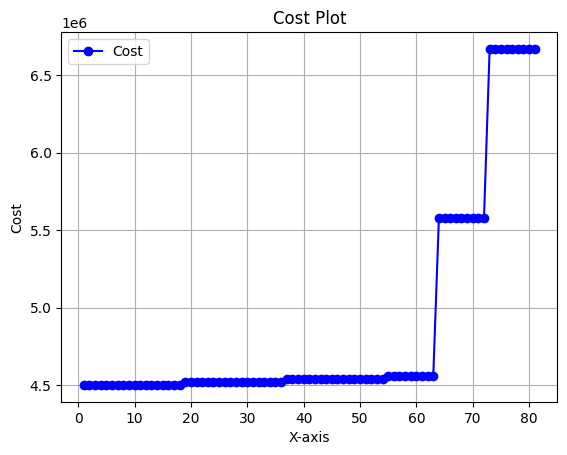

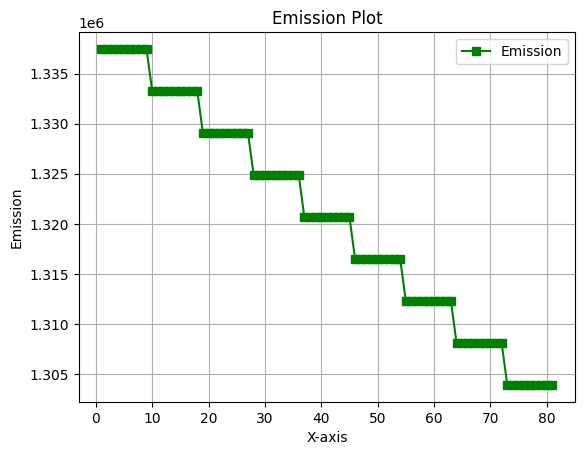

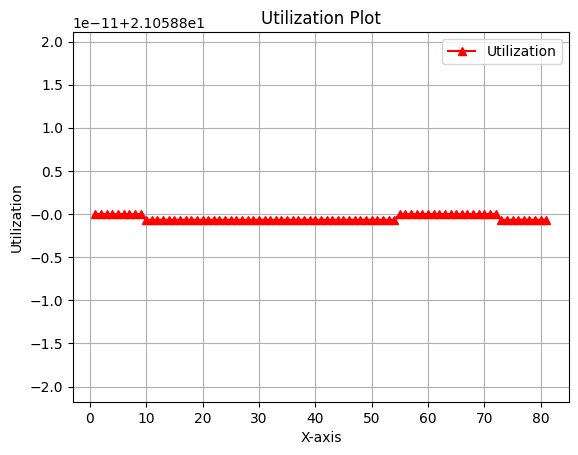

In [71]:
plt.figure(1)
plt.plot(x, list_z1, label='Cost', marker='o', color='blue')
plt.title("Cost Plot")
plt.xlabel("X-axis")
plt.ylabel("Cost")
plt.legend()
plt.grid(True)

plt.figure(2)
plt.plot(x, list_z2, label='Emission', marker='s', color='green')
plt.title("Emission Plot")
plt.xlabel("X-axis")
plt.ylabel("Emission")
plt.legend()
plt.grid(True)

plt.figure(3)
plt.plot(x, list_z3, label='Utilization', marker='^', color='red')
plt.title("Utilization Plot")
plt.xlabel("X-axis")
plt.ylabel("Utilization")
plt.legend()
plt.grid(True)

plt.show()                  